In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests


In [2]:
tn_WLB_path="resources/Work-Life-Balance-2022.csv"
tn_emp_path = "resources/employers_clean.csv"

tn_employers_df=pd.read_csv(tn_emp_path, encoding = "ISO-8859-1")
tn_WLB_df=pd.read_csv(tn_WLB_path, encoding = "ISO-8859-1")
tn_employers_df

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino
...,...,...,...,...,...,...,...,...
95,96,Mastercard,MA,Banking and Financial Services,United States,"24,000",4.3,Purchase
96,97,Electricite de France,EDF.PA,Utilities,France,"167,157",4.0,Paris
97,98,Verbund,VER.VI,Utilities,Austria,"3,184",4.7,Vienna
98,99,Panasonic,6572.T,"Engineering, Manufacturing",Japan,"240,198",3.8,Kadoma


In [3]:
tn_employers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RANK              100 non-null    int64  
 1   NAME              100 non-null    object 
 2   TICKER            100 non-null    object 
 3   INDUSTRIES        100 non-null    object 
 4   Country           100 non-null    object 
 5   EMPLOYEES         100 non-null    object 
 6   Glassdoor Rating  100 non-null    float64
 7   City              100 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.4+ KB


In [4]:
def unique(values): 
    # initialize a empty list
    unique_values = []
 
    # looping all values
    for x in values:
        # check if exists in unique_list or not
        if x not in unique_values:
            unique_values.append(x)
    # print list
    for x in unique_values:
        print(x)

values = sorted(tn_employers_df['NAME'])
unique(values) 

# print(f"Name checking to see if theres any bad data in the dataset for company name: {tn_employers_df['NAME'].sort_values()}")
# print("")      

3M
AIRBUS
Adidas
Adobe
Alibaba Group
Alphabet
Amazon
Apple
Armani Group
BMW Group
Boeing
Bosch
Capital One
Carl-Zeiss-Stiftung
Chanel
Cisco Systems
Coca-Cola
Colgate-Palmolive
Costco Wholesale
DBS Bank
DM
Dassault Group
De'Longhi
Decathlon
Dell Technologies
Delta Air Lines
Discover Financial Services
Dr. Oetker
ENBW
Electricite de France
Emirates
Enel
Ferrari
Ford Motor
Fraunhofer Society
General Dynamics
General Motors
Honda Motor
Huawei
Hyatt Hotels
IBM
IKEA
Intel
Intuit
JD.com
Johnson & Johnson
Kempinski Hotels
L'Oreal
Lockheed Martin
MTU Aero Engines
Marriott International
Mastercard
Mercedes-Benz Group
Merck KGaA, Darmstadt, Germany and its affiliates
Meritz Financial Group
Michelin Group
Microsoft
Mitsubishi Electric
Naval Group
Naver
Netflix
Nike
Northrop Grumman
Novartis
Oracle
Panasonic
PayPal
Pfizer
Philips
Pirelli
Prada
Puma
Raymond James Financial
Reliance Industries
Rolex
Rolls-Royce Holdings
Rossmann
SK Group
STIHL
Safran
Samsung Electronics
Sanofi
Saudi Arabian Oil Compa

In [5]:
values = sorted(tn_employers_df['INDUSTRIES'])
unique(values)

Aerospace & Defense
Automotive (Automotive and Suppliers)
Banking and Financial Services
Clothing, Shoes, Sports Equipment
Conglomerate
Construction, Oil & Gas Operations, Mining and Chemicals
Drugs & Biotechnology
Engineering, Manufacturing
Food, Soft Beverages, Alcohol & Tobacco
Health Care Equipment & Services
Healthcare & Social
IT, Internet, Software & Services
Media & Advertising
Packaged Goods
Retail and Wholesale
Semiconductors, Electronics, Electrical Engineering, Technology Hardware & Equipment
Telecommunications Services, Cable Supplier
Transportation and Logistics
Travel & Leisure      
Utilities


In [6]:
values = sorted(tn_employers_df['Country'])
unique(values)

Austria
Canada
China
France
Germany
India
Italy
Japan
Netherlands
Saudi Arabia
Singapore
South Kore
South Korea
Sweden
Switzerland
United Arab Emirates
United Kingdom
United States


In [7]:
# print(f"Name checking to see if theres any bad data in the dataset for Industries: {tn_employers_df['INDUSTRIES'].unique()}")
# print("")     

values = sorted(tn_employers_df['City'])
unique(values) 

Armonk
Atlanta
Austin
Baltimore
Basel
Beaverton
Beijing
Bethesda
Bielefeld
Burgwedel
Chicago
Clermont-Ferrand
Clichy
Cupertino
Dallas
Darmstadt
Dearborn
Detroit
Dhahran
Dubai
Falls Church
Geneva
Gothenburg
Grasbrunn
Hamamatsu
Hangzhou
Hanover
Hartford
Herzogenaurach
Hofheim am Taunus
Issaquah
Kadoma
Karlsruhe
London
Los Gatos
Maranello
McLean
Milan
Minneapolis
Mountain View
Mumbai
Munich
New Brunswick
New York
Oberkochen
Ottawa
Paris
Pearl River
Pittsburgh
Purchase
Redmond
Reston
Riverwoods
Rome
Round Rock
Saint Paul
San Jose
Santa Clara
Seattle
Seoul
Shenzhen
Singapore
Stuttgart
Suwon
Tokyo
Toronto
Toulouse
Treviso
Vienna
Villeneuve-d'Ascq
VÂlizy-Villacoublay
Waiblingen
Weston
Wolfsburg


In [8]:
#Replace word 'South Kore' to 'South korea' and employees for plotting
tn_employers_df['Country'] = tn_employers_df['Country'].replace('South Kore','South Korea')
tn_employers_df['EMPLOYEES'] = tn_employers_df['EMPLOYEES'].str.replace(',','')
tn_employers_df['EMPLOYEES'] = tn_employers_df['EMPLOYEES'].astype(float)
tn_employers_df

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Korea,266673.0,3.8,Suwon
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,221000.0,4.4,Redmond
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,250000.0,4.2,Armonk
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,156500.0,4.5,Mountain View
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,154000.0,4.1,Cupertino
...,...,...,...,...,...,...,...,...
95,96,Mastercard,MA,Banking and Financial Services,United States,24000.0,4.3,Purchase
96,97,Electricite de France,EDF.PA,Utilities,France,167157.0,4.0,Paris
97,98,Verbund,VER.VI,Utilities,Austria,3184.0,4.7,Vienna
98,99,Panasonic,6572.T,"Engineering, Manufacturing",Japan,240198.0,3.8,Kadoma


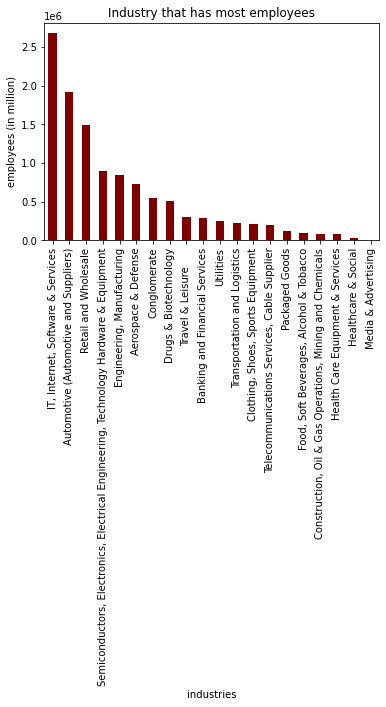

In [9]:
# Which industry has most employees in top 100

# preparing / structuring the dataframe so we can find the desired  x and y axis for plotting
total_employee = tn_employers_df.groupby('INDUSTRIES')['EMPLOYEES'].sum().sort_values(ascending=False)
# print(total_employee)

# creating the bar plot
total_employee.plot.bar(x='industries', y='total employees', title="Industry that has most employees", color ='maroon')
plt.xlabel("industries")
plt.ylabel("employees (in million)")
plt.show()



IT, Internet, Software & Services                                                       12
Banking and Financial Services                                                          10
Aerospace & Defense                                                                     10
Automotive (Automotive and Suppliers)                                                   10
Retail and Wholesale                                                                     8
Clothing, Shoes, Sports Equipment                                                        7
Engineering, Manufacturing                                                               7
Semiconductors, Electronics, Electrical Engineering, Technology Hardware & Equipment     6
Drugs & Biotechnology                                                                    6
Conglomerate                                                                             4
Utilities                                                                                4

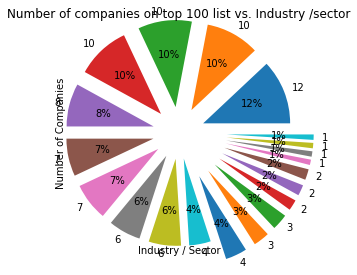

In [10]:
# Which industry has most companies in top 100

industries = tn_employers_df['INDUSTRIES'].value_counts()
print(industries)

# Plot the top 10 countries
# countries.plot.pie(x=countries, y=countries)
explode = (0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,
          0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55)
plt.pie(industries, labels = tn_employers_df['INDUSTRIES'].value_counts(), explode=explode, autopct='%1.0f%%')

# Add labels to the plot
plt.xlabel('Industry / Sector')
plt.ylabel('Number of Companies')
plt.title('Number of companies on top 100 list vs. Industry /sector')

# Rotate the labels on the x-axis to make them easier to read
plt.xticks(rotation=90)

# Display the plot
plt.show()

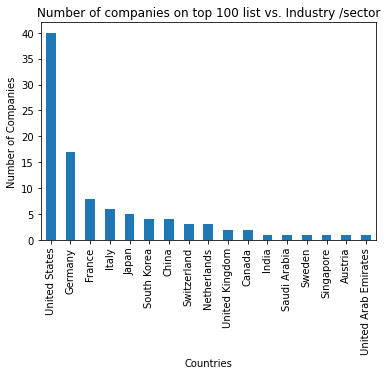

In [11]:
# Which country has highest number of companies

countries = tn_employers_df['Country'].value_counts()
# print(countries)

# Add labels to the plot
plt.xlabel('Countries')
plt.ylabel('Number of Companies')
plt.title('Number of companies on top 100 list vs. Industry /sector')

# Display the plot
countries.plot.bar()

In [12]:
tn_employers_df.sort_values(by='EMPLOYEES')

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City
85,86,Meritz Financial Group,008560.KS,Banking and Financial Services,South Korea,20.0,5.0,Seoul
97,98,Verbund,VER.VI,Utilities,Austria,3184.0,4.7,Vienna
17,18,Ferrari,RACE,Automotive (Automotive and Suppliers),Italy,4556.0,3.8,Maranello
84,85,Naver,035420.KS,"IT, Internet, Software & Services",South Korea,4696.0,4.1,Seoul
73,74,T Rowe Price,TROW,Banking and Financial Services,United States,7529.0,3.8,Baltimore
...,...,...,...,...,...,...,...,...
37,38,Siemens,SIE.DE,"Engineering, Manufacturing",Germany,303000.0,4.1,Munich
23,24,Bosch,none,Automotive (Automotive and Suppliers),Germany,402600.0,3.8,Grasbrunn
50,51,Target,TGT,Retail and Wholesale,United States,450000.0,3.6,Minneapolis
43,44,Volkswagen Group,VOW.DE,Automotive (Automotive and Suppliers),Germany,668000.0,4.1,Wolfsburg


In [13]:
#create the bins in which data will be held
size_bins = [0, 100000, 500000, 2000000]
#create the names for the four bins
labels = ["Small (<100000)", "Medium (100000-500000)", "Large (>500000)"]

tn_employers_df['Employer Size'] = pd.cut(tn_employers_df['EMPLOYEES'], size_bins, labels=labels)

tn_employers_df.sort_values(by='Employer Size', ascending=False)

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,Employer Size
43,44,Volkswagen Group,VOW.DE,Automotive (Automotive and Suppliers),Germany,668000.0,4.1,Wolfsburg,Large (>500000)
13,14,Amazon,AMZN,"IT, Internet, Software & Services",United States,1608000.0,3.8,Seattle,Large (>500000)
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Korea,266673.0,3.8,Suwon,Medium (100000-500000)
29,30,JD.com,9618.HK,Retail and Wholesale,China,298717.0,3.7,Beijing,Medium (100000-500000)
33,34,Honda Motor,7267.T,Automotive (Automotive and Suppliers),Japan,211374.0,3.9,Tokyo,Medium (100000-500000)
...,...,...,...,...,...,...,...,...,...
59,60,MTU Aero Engines,MTX.DE,Aerospace & Defense,Germany,10000.0,3.9,Munich,Small (<100000)
60,61,Chanel,none,"Clothing, Shoes, Sports Equipment",United Kingdom,28500.0,3.9,London,Small (<100000)
61,62,Raymond James Financial,RJF,Banking and Financial Services,United States,15000.0,4.4,Toronto,Small (<100000)
26,27,Intuit,INTU,"IT, Internet, Software & Services",United States,14200.0,4.5,Mountain View,Small (<100000)


In [22]:
# Company with least number of employees

# School_summary_df2 = School_summary_df.sort_values(['% Overall Passing']).head(5)
tn_employers_least_df = tn_employers_df.sort_values(['EMPLOYEES']).head(10)
tn_employers_least_df

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,Employer Size
85,86,Meritz Financial Group,008560.KS,Banking and Financial Services,South Korea,20.0,5.0,Seoul,Small (<100000)
97,98,Verbund,VER.VI,Utilities,Austria,3184.0,4.7,Vienna,Small (<100000)
17,18,Ferrari,RACE,Automotive (Automotive and Suppliers),Italy,4556.0,3.8,Maranello,Small (<100000)
84,85,Naver,035420.KS,"IT, Internet, Software & Services",South Korea,4696.0,4.1,Seoul,Small (<100000)
73,74,T Rowe Price,TROW,Banking and Financial Services,United States,7529.0,3.8,Baltimore,Small (<100000)
32,33,Armani Group,none,"Clothing, Shoes, Sports Equipment",Italy,8000.0,3.7,Milan,Small (<100000)
59,60,MTU Aero Engines,MTX.DE,Aerospace & Defense,Germany,10000.0,3.9,Munich,Small (<100000)
93,94,De'Longhi,DLG.MI,"Engineering, Manufacturing",Italy,10000.0,4.0,Treviso,Small (<100000)
55,56,Shopify,SHOP,"IT, Internet, Software & Services",Canada,10000.0,3.7,Ottawa,Small (<100000)
66,67,Netflix,NFLX,Media & Advertising,United States,11300.0,4.3,Los Gatos,Small (<100000)


In [14]:
tn_WLB_df

,2022,2021,City,Country,Remote Jobs,Overworked Population,Minimum Vacations Offered (Days),Vacations Taken (Days),Unemployment,Multiple Jobholders,...,Healthcare,Access to Mental Healthcare,Inclusivity & Tolerance,Affordability,"Happiness, Culture & Leisure",City Safety,Outdoor Spaces,Air Quality,Wellness and Fitness,TOTAL SCORE
0,1,2,Oslo,Norway,41.72%,11.20%,25,25,94.7,9.10%,...,100.0,85.0,93.2,59.4,88.8,86.5,95.6,97.5,65.7,100.00
1,2,-,Bern,Switzerland,44.86%,11.40%,20,25,99.8,7.60%,...,99.6,78.6,94.6,69.9,100.0,91.8,87.1,100.0,69.1,99.46
2,3,1,Helsinki,Finland,38.92%,12.70%,25,30,89.3,6.30%,...,96.7,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.24
3,4,3,Zurich,Switzerland,44.86%,11.90%,20,25,99.2,7.60%,...,99.2,78.6,87.5,71.6,91.5,92.8,84.0,96.2,68.7,96.33
4,5,5,Copenhagen,Denmark,41.42%,10.50%,25,28,94.8,7.60%,...,94.8,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,49,Bangkok,Thailand,16.84%,15.10%,6,10,99.2,3.70%,...,75.7,79.7,73.5,50.0,65.8,27.8,70.1,84.0,65.4,70.73
96,97,47,Sao Paulo,Brazil,25.65%,11.80%,10,30,79.6,4.70%,...,62.5,50.0,79.5,55.5,75.8,17.4,76.9,88.0,61.9,66.57
97,98,50,Kuala Lumpur,Malaysia,30.70%,17.10%,8,12,94.9,1.10%,...,66.7,74.3,57.0,70.5,59.5,47.2,62.2,84.8,59.7,66.02
98,99,-,Dubai,UAE,28.89%,23.40%,30,27,100.0,10.00%,...,69.4,52.2,50.0,78.0,79.2,97.9,50.0,50.0,58.6,61.23


In [15]:
employers_places_df=pd.merge(tn_employers_df, tn_WLB_df, on="City",how="inner")
employers_places_df

,RANK,NAME,TICKER,INDUSTRIES,Country_x,EMPLOYEES,Glassdoor Rating,City,Employer Size,2022,...,Healthcare,Access to Mental Healthcare,Inclusivity & Tolerance,Affordability,"Happiness, Culture & Leisure",City Safety,Outdoor Spaces,Air Quality,Wellness and Fitness,TOTAL SCORE
0,6,Delta Air Lines,DAL,Transportation and Logistics,United States,80000.0,4.2,Atlanta,Small (<100000),60,...,86.1,66.9,86.7,83.0,82.9,51.6,92.2,95.6,59.9,84.06
1,32,Coca-Cola,KO,"Food, Soft Beverages, Alcohol & Tobacco",United States,79000.0,4.1,Atlanta,Small (<100000),60,...,86.1,66.9,86.7,83.0,82.9,51.6,92.2,95.6,59.9,84.06
2,52,The Home Depot,HD,Retail and Wholesale,United States,30000.0,4.0,Atlanta,Small (<100000),60,...,86.1,66.9,86.7,83.0,82.9,51.6,92.2,95.6,59.9,84.06
3,9,Southwest Airlines,LUV,Transportation and Logistics,United States,55093.0,4.4,Dallas,Small (<100000),77,...,85.7,67.5,84.6,99.0,81.3,58.0,77.6,96.6,56.4,81.74
4,13,BMW Group,BMW.DE,Automotive (Automotive and Suppliers),Germany,118909.0,4.2,Munich,Medium (100000-500000),10,...,95.4,82.0,92.8,71.1,87.0,88.5,78.4,95.8,67.6,93.65
5,19,Fraunhofer Society,none,Healthcare & Social,Germany,30028.0,4.1,Munich,Small (<100000),10,...,95.4,82.0,92.8,71.1,87.0,88.5,78.4,95.8,67.6,93.65
6,38,Siemens,SIE.DE,"Engineering, Manufacturing",Germany,303000.0,4.1,Munich,Medium (100000-500000),10,...,95.4,82.0,92.8,71.1,87.0,88.5,78.4,95.8,67.6,93.65
7,60,MTU Aero Engines,MTX.DE,Aerospace & Defense,Germany,10000.0,3.9,Munich,Small (<100000),10,...,95.4,82.0,92.8,71.1,87.0,88.5,78.4,95.8,67.6,93.65
8,70,Wacker Chemie,WCH.DE,"Construction, Oil & Gas Operations, Mining and...",Germany,14400.0,4.0,Munich,Small (<100000),10,...,95.4,82.0,92.8,71.1,87.0,88.5,78.4,95.8,67.6,93.65
9,14,Amazon,AMZN,"IT, Internet, Software & Services",United States,1608000.0,3.8,Seattle,Large (>500000),32,...,89.9,65.7,94.7,88.6,90.7,59.7,95.6,99.2,64.5,88.38


In [16]:
employers_places_cleaned=employers_places_df[['RANK','NAME','TICKER','Country_x','EMPLOYEES','Glassdoor Rating','City','TOTAL SCORE']]
employers_places_cleaned=employers_places_cleaned.rename(columns={"Country_x":"Country","TOTAL SCORE":"Work-Life balance score"})
employers_places_cleaned.sort_values(by='RANK')

,RANK,NAME,TICKER,Country,EMPLOYEES,Glassdoor Rating,City,Work-Life balance score
0,6,Delta Air Lines,DAL,United States,80000.0,4.2,Atlanta,84.06
3,9,Southwest Airlines,LUV,United States,55093.0,4.4,Dallas,81.74
4,13,BMW Group,BMW.DE,Germany,118909.0,4.2,Munich,93.65
9,14,Amazon,AMZN,United States,1608000.0,3.8,Seattle,88.38
5,19,Fraunhofer Society,none,Germany,30028.0,4.1,Munich,93.65
10,21,Rolex,none,Switzerland,14000.0,3.9,Geneva,95.82
12,25,Mercedes-Benz Group,MBG.DE,Germany,172425.0,3.9,Stuttgart,93.79
13,28,Safran,SAF.PA,France,76800.0,3.8,Paris,89.73
17,29,Pfizer,PFE,United States,79000.0,4.1,New York,84.23
1,32,Coca-Cola,KO,United States,79000.0,4.1,Atlanta,84.06


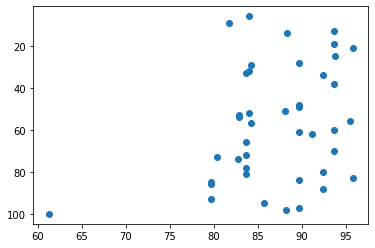

In [25]:
plt.scatter(employers_places_cleaned['Work-Life balance score'],employers_places_cleaned['RANK'])
plt.gca().invert_yaxis()